# FIFA 2019 Player Dataset Analysis
This notebook contains the **cleaning and exploratory data analysis (EDA)** of the FIFA 2019 dataset.  
We will look at player ratings, market value, wages, positions, nationalities, and club analysis.


## 1️⃣ Import Libraries
We start by importing **pandas, numpy, matplotlib, and seaborn** for data cleaning and visualization.


In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2️⃣ Load Dataset
We load the dataset and check the first few rows.


In [94]:
df = pd.read_csv("fifa19.csv")
df.head(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [95]:
df.isna().sum()

,0
Unnamed: 0,0
ID,0
Name,0
Age,0
Photo,0
...,...
GKHandling,48
GKKicking,48
GKPositioning,48
GKReflexes,48


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

## 3️⃣ Data Cleaning
We will remove unnecessary columns, fix data types, handle missing values, and remove duplicates.


In [97]:
df = df.drop_duplicates()

In [98]:
df.duplicated().sum()

np.int64(0)

In [99]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

##**Drop Unnecessary Columns**

In [100]:
df = df.drop(columns=["Unnamed: 0", "Photo", "Flag", "Club Logo"])

In [101]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,1189,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,1228,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [102]:
df.shape

(18207, 85)

In [103]:
df["Value"]

,Value
0,€110.5M
1,€77M
2,€118.5M
3,€72M
4,€102M
...,...
18202,€60K
18203,€60K
18204,€60K
18205,€60K


In [104]:
df["Value"] = df["Value"].replace("€", "", regex=True).replace({"M":"e6", "K":"e3"} , regex=True).astype(float)

In [105]:
df["Value"]

,Value
0,110500000.0
1,77000000.0
2,118500000.0
3,72000000.0
4,102000000.0
...,...
18202,60000.0
18203,60000.0
18204,60000.0
18205,60000.0


In [106]:
df["Skill Moves"].isna().sum()

np.int64(48)

In [107]:
df["Skill Moves"] = df["Skill Moves"].fillna(df["Skill Moves"].median())

In [108]:
df["International Reputation"]

,International Reputation
0,5.0
1,5.0
2,5.0
3,4.0
4,4.0
...,...
18202,1.0
18203,1.0
18204,1.0
18205,1.0


In [109]:
df["International Reputation"] = df["International Reputation"].fillna(df["International Reputation"].mode())

In [110]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking

In [111]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60000.0,€1K,1307,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60000.0,€1K,1098,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,England,47,67,Cambridge United,60000.0,€1K,1189,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60000.0,€1K,1228,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [113]:
df["Wage"].head(30).sort_values(ascending=False)

,Wage
9,€94K
0,€565K
7,€455K
6,€420K
1,€405K
8,€380K
11,€355K
4,€355K
5,€340K
28,€315K


In [114]:
df["Wage"] = df["Wage"].replace("€", "", regex=True).replace({"M":"e6", "K":"e3"} , regex=True).astype(float)

In [115]:
df["Wage"]

,Wage
0,565000.0
1,405000.0
2,290000.0
3,260000.0
4,355000.0
...,...
18202,1000.0
18203,1000.0
18204,1000.0
18205,1000.0


✅ We have now **cleaned numeric values**, handled **missing values**, and removed duplicates.


## 4️⃣ Exploratory Data Analysis (EDA)
We will analyze the dataset to understand player ratings, positions, clubs, nationalities, wages, and market value.


##4.1 Average Player Rating by Age

In [119]:
Average_Player_Rating_ByAge = df.groupby("Age")["Overall"].mean().reset_index()

In [126]:
Average_Player_Rating_ByAge.head()

,Age,Overall
0,16,54.452381
1,17,56.404844
2,18,57.741803
3,19,59.583008
4,20,61.858871


/tmp/ipython-input-709354151.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Average_Player_Rating_ByAge, x="Age", y="Overall", palette="viridis")


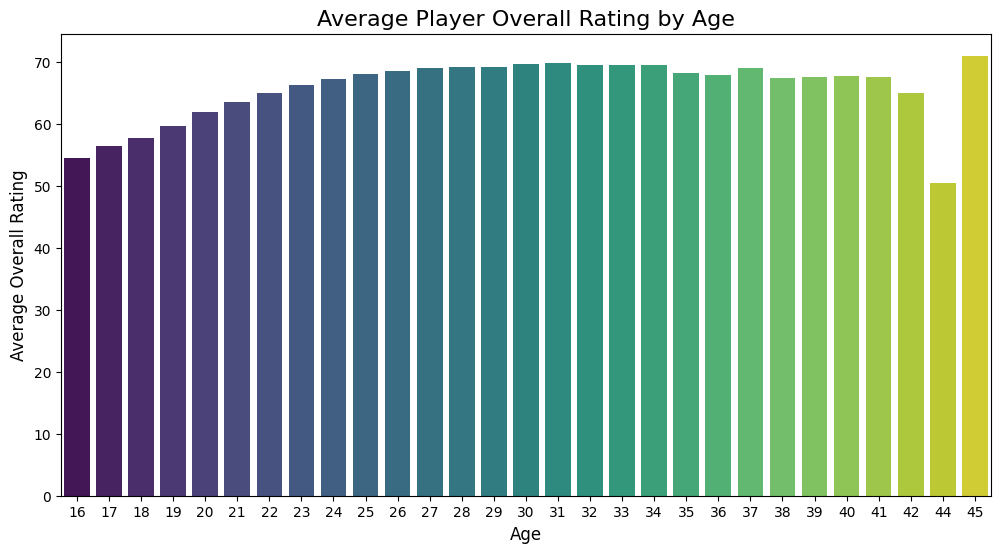

In [131]:
plt.figure(figsize=(12,6))
sns.barplot(data=Average_Player_Rating_ByAge, x="Age", y="Overall", palette="viridis")
plt.title("Average Player Overall Rating by Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Average Overall Rating", fontsize=12)
plt.xticks(rotation=0)
plt.show()

📊 **Observation:** Players around ages 25-28 tend to have the highest average overall ratings.


##4.2 Average Player Rating by Position

In [125]:
avg_rating_by_position = df.groupby('Position')['Overall'].mean().sort_values(ascending=False)
avg_rating_by_position.head(10)

,Overall
Position,
LF,73.866667
RF,73.250000
RAM,72.285714
LAM,71.857143
LS,70.062802
RDM,69.754032
RS,69.522167
RCB,69.283988
LCM,69.270886


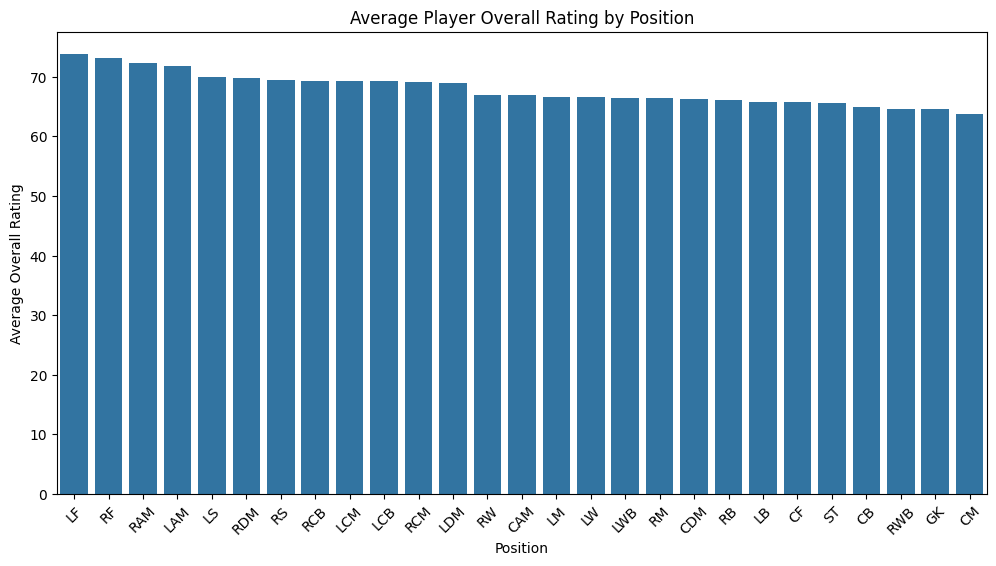

In [136]:
plt.figure(figsize=(12,6))
sns.barplot(x=avg_rating_by_position.index, y=avg_rating_by_position.values)
plt.xticks(rotation=45)
plt.title("Average Player Overall Rating by Position")
plt.ylabel("Average Overall Rating")
plt.show()

📊 **Observation:** Certain positions like CAM or ST tend to have higher average ratings.


##4.3 Top Countries by Player Rating

In [162]:
top_countries = df.groupby("Nationality")["Overall"].mean().sort_values(ascending=False).head(15)
top_countries

,Overall
Nationality,
United Arab Emirates,77.000000
Central African Rep.,73.333333
Dominican Republic,72.000000
São Tomé & Príncipe,72.000000
Oman,72.000000
Cape Verde,71.631579
Portugal,71.344720
Togo,71.333333
Brazil,71.251511


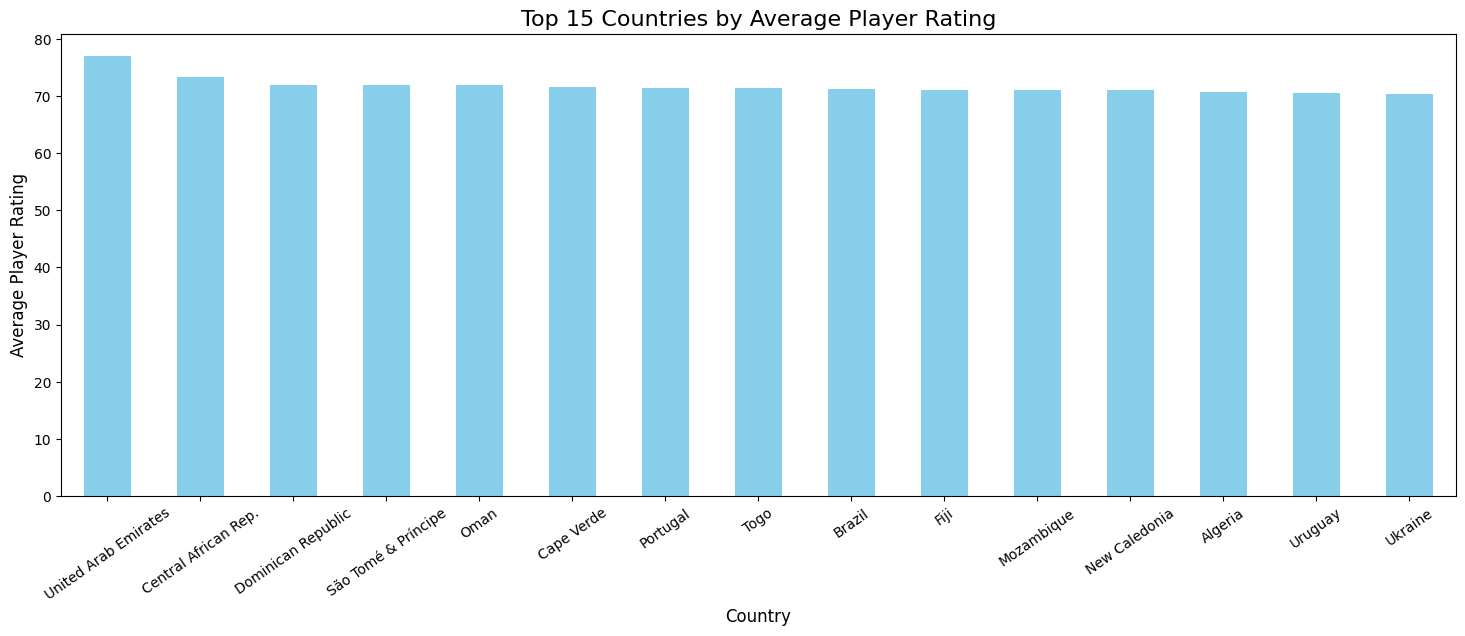

In [163]:
plt.figure(figsize=(18,6))
top_countries.plot(kind='bar', color='skyblue')
plt.title("Top 15 Countries by Average Player Rating", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Average Player Rating", fontsize=12)
plt.xticks(rotation=35)
plt.show()

##4.4 Potential vs Overall

In [177]:
Potential_vs_Overall = df.groupby("Overall")["Potential"].mean().reset_index()

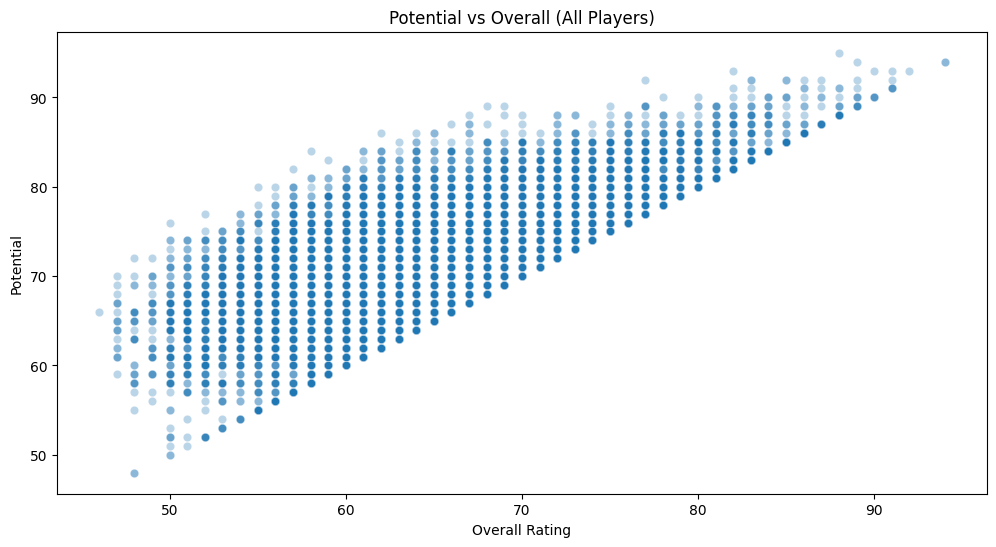

In [180]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="Overall", y="Potential", alpha=0.3)  # alpha makes points transparent
plt.title("Potential vs Overall (All Players)")
plt.xlabel("Overall Rating")
plt.ylabel("Potential")
plt.show()

##4.5 Top 10 Clubs by Average Player Rating

In [173]:
Top_Clubs = df.groupby("Club")["Overall"].mean().sort_values(ascending= False).head(10).reset_index()
Top_Clubs

,Club,Overall
0,Juventus,82.280000
1,Napoli,80.000000
2,Inter,79.750000
3,Real Madrid,78.242424
4,Milan,78.074074
5,FC Barcelona,78.030303
6,Paris Saint-Germain,77.433333
7,Roma,77.423077
8,Manchester United,77.242424
9,FC Bayern München,77.000000


/tmp/ipython-input-3751245718.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Top_Clubs, x="Overall", y="Club", palette="magma")


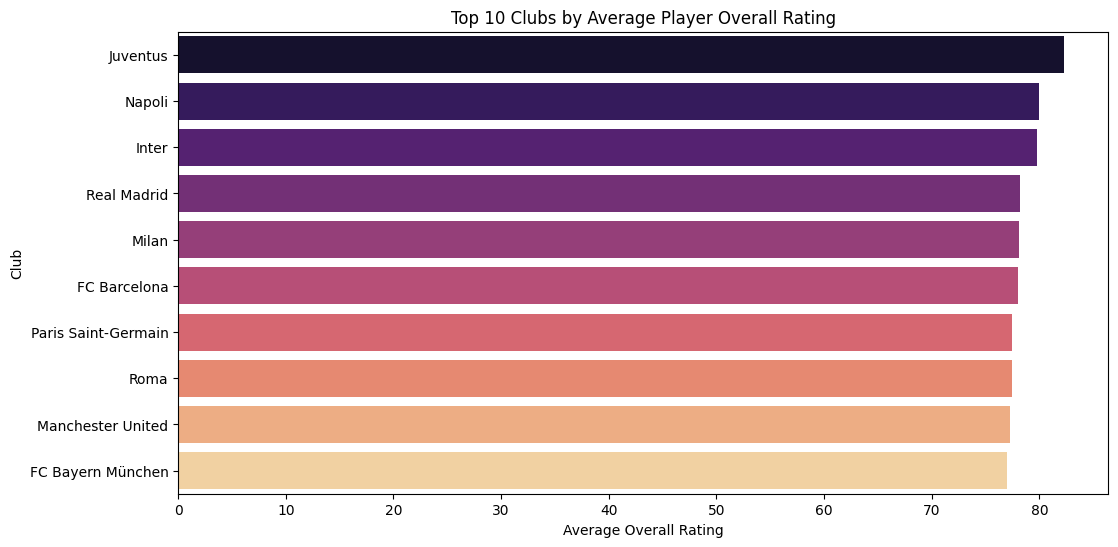

In [174]:
plt.figure(figsize=(12,6))
sns.barplot(data=Top_Clubs, x="Overall", y="Club", palette="magma")
plt.title("Top 10 Clubs by Average Player Overall Rating")
plt.xlabel("Average Overall Rating")
plt.ylabel("Club")
plt.show()

##4.6 Top 20 Nationalities by Max Rating

In [185]:
top_nationalities = df.groupby('Nationality')['Overall'].max().sort_values(ascending=False).head(20).reset_index()

/tmp/ipython-input-993720977.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_nationalities, x="Overall", y="Nationality", palette="viridis")


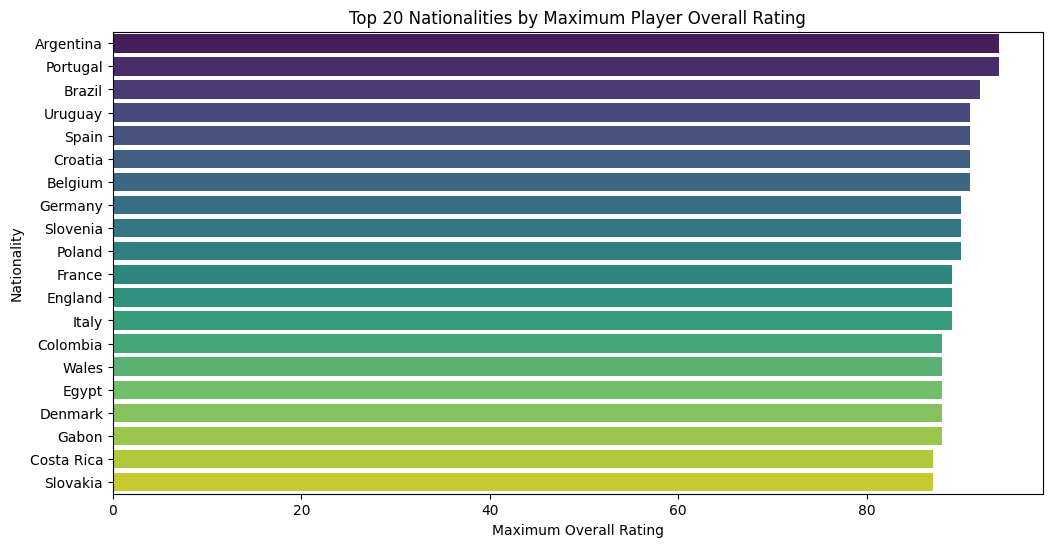

In [186]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_nationalities, x="Overall", y="Nationality", palette="viridis")
plt.title("Top 20 Nationalities by Maximum Player Overall Rating")
plt.xlabel("Maximum Overall Rating")
plt.ylabel("Nationality")
plt.show()

##4.7 Top 10 Positions by Average Rating

In [189]:
top_positions = df.groupby('Position')['Overall'].agg(['mean','count']).sort_values(by='mean', ascending=False).head(10).reset_index()
top_positions

,Position,mean,count
0,LF,73.866667,15
1,RF,73.250000,16
2,RAM,72.285714,21
3,LAM,71.857143,21
4,LS,70.014563,206
5,RDM,69.754032,248
6,RS,69.485149,202
7,RCB,69.283988,662
8,LCM,69.263959,394
9,LCB,69.240741,648


/tmp/ipython-input-2422406042.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_positions, x='mean', y='Position', palette='coolwarm')


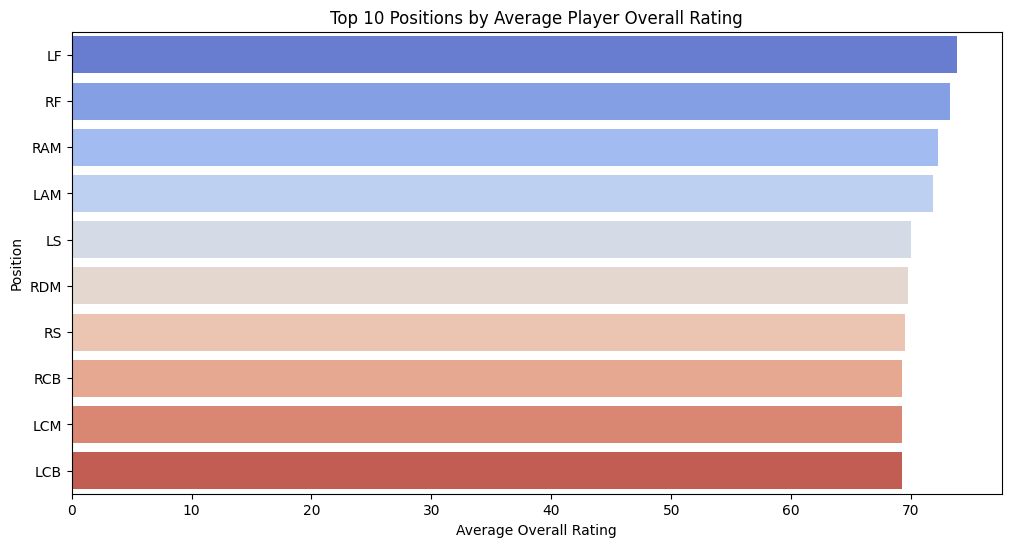

In [188]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_positions, x='mean', y='Position', palette='coolwarm')
plt.title("Top 10 Positions by Average Player Overall Rating")
plt.xlabel("Average Overall Rating")
plt.ylabel("Position")
plt.show()


##4.8 Top 10 Highest-Paid Players

In [192]:
Top10_Paid_Players = df[["Name","Club","Wage","Overall"]].sort_values(by= "Wage" , ascending=False).head(10)
Top10_Paid_Players

,Name,Club,Wage,Overall
0,L. Messi,FC Barcelona,565000.0,94
7,L. Suárez,FC Barcelona,455000.0,91
6,L. Modrić,Real Madrid,420000.0,91
1,Cristiano Ronaldo,Juventus,405000.0,94
8,Sergio Ramos,Real Madrid,380000.0,91
36,G. Bale,Real Madrid,355000.0,88
4,K. De Bruyne,Manchester City,355000.0,91
11,T. Kroos,Real Madrid,355000.0,90
32,Coutinho,FC Barcelona,340000.0,88
5,E. Hazard,Chelsea,340000.0,91


/tmp/ipython-input-2415661234.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Top10_Paid_Players, x='Wage', y='Name', palette='viridis')


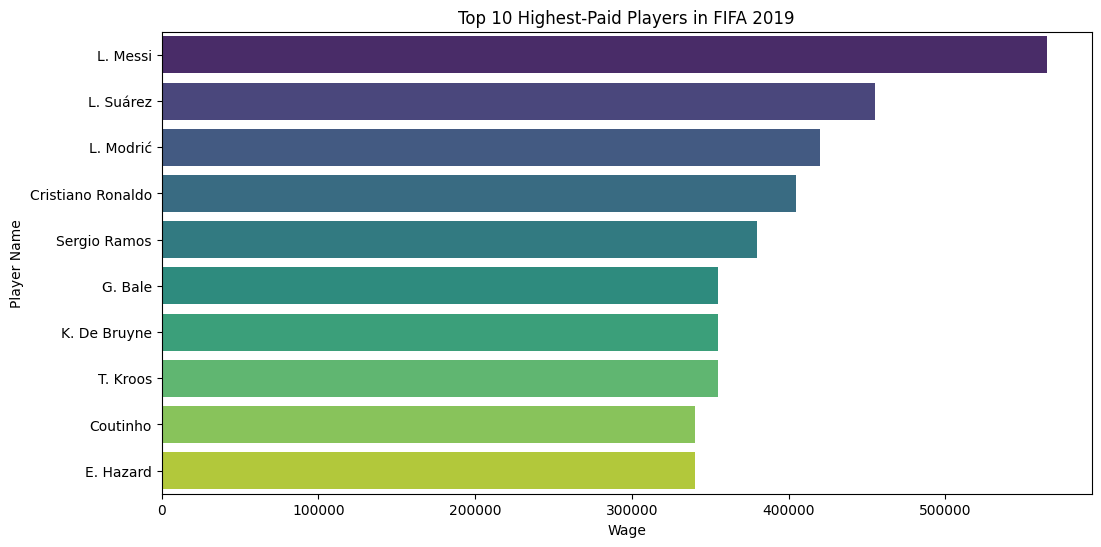

In [194]:
plt.figure(figsize=(12,6))
sns.barplot(data=Top10_Paid_Players, x='Wage', y='Name', palette='viridis')
plt.title("Top 10 Highest-Paid Players in FIFA 2019")
plt.xlabel("Wage")
plt.ylabel("Player Name")
plt.show()


##4.9 Overall vs Market Value

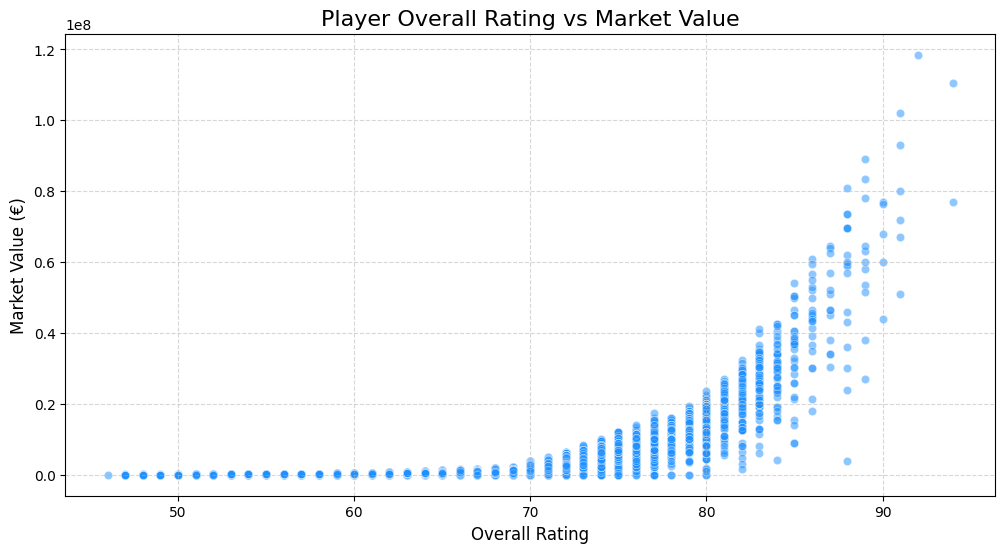

In [195]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Overall', y='Value', alpha=0.5, color='dodgerblue')
plt.title("Player Overall Rating vs Market Value", fontsize=16)
plt.xlabel("Overall Rating", fontsize=12)
plt.ylabel("Market Value (€)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


📊 **Observation:** Generally, higher overall rating correlates with higher market value, but there are exceptions.


## 5️⃣ Conclusion
- Players around **25-28 years** have the highest average rating.  
- **Attacking positions** tend to have higher ratings.  
- Top clubs and countries dominate in player quality.  
- High wages generally match high ratings but exceptions exist.  
- This analysis can help in **team building, scouting, and market analysis**.
